In [1]:
## testing ty_trans_int_z diagnostic for Part 3 with Qian experiments

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

In [2]:
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
session=cc.database.create_session()
#expt = '01deg_jra55v13_ryf9091'

In [5]:
import dask.config
from dask.distributed import Client,LocalCluster
from dask_jobqueue import PBSCluster

c = Client()
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 126.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42679,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 126.00 GiB
Comm: tcp://127.0.0.1:35781,Total threads: 4
Dashboard: /proxy/36505/status,Memory: 18.00 GiB
Nanny: tcp://127.0.0.1:43143,


2024-10-17 10:50:23,328 - distributed.nanny - WARNING - Restarting worker
2024-10-17 10:51:23,400 - distributed.nanny - WARNING - Restarting worker


In [48]:

exp_ctrl= '01deg_jra55v13_ryf9091'
exp_wthmp= '01deg_jra55v13_ryf9091_qian_wthmp'
exp_wthp= '01deg_jra55v13_ryf9091_qian_wthp'
lat_lim = slice(-79, -60)
lon_lim = slice(-279.99,80)

#### SET EXPT HERE
expt = exp_ctrl


In [49]:
# We will use an annual average from 10 year in the RYF run
start_time_mw='2110-01-01 00:00:00' 
end_time_mw='2159-12-31 00:00:00'

flex_period = slice(start_time_mw, end_time_mw)

## making ualong decade average fields


In [50]:
u = cc.querying.getvar(expt=expt, variable='tx_trans_int_z', 
                          session=session).sel(time=flex_period).sel(yt_ocean = slice(-79,-60)).chunk({ 'yt_ocean':69, 'xu_ocean':360})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

In [51]:
v = cc.querying.getvar(expt=expt, variable='ty_trans_int_z', 
                          session=session).sel(yu_ocean = slice(-79,-60)).sel(time=flex_period).chunk({ 'yu_ocean':69, 'xt_ocean':360})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

In [52]:
u.isel(time = 100)

<xarray.DataArray 'tx_trans_int_z' (yt_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<getitem, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 4kB -79.0 -78.95 -78.91 ... -60.15 -60.1 -60.05
    time      object 8B 2118-05-16 12:00:00
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
Attributes:
    long_name:      T-cell i-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf90...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration with JRA...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...
    url:            https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra5...

In [53]:
v.isel(time = 100)

<xarray.DataArray 'ty_trans_int_z' (yu_ocean: 440, xt_ocean: 3600)> Size: 6MB
dask.array<getitem, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
    time      object 8B 2118-05-16 12:00:00
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
Attributes:
    long_name:      T-cell j-mass transport vertically summed
    units:          kg/s
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf90...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration with JRA...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...
    url:            https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra5...

In [54]:
ty_trans_int_z_test = v.isel(time = 100).values#.load()
tx_trans_int_z_test = u.isel(time = 100).values#.load()

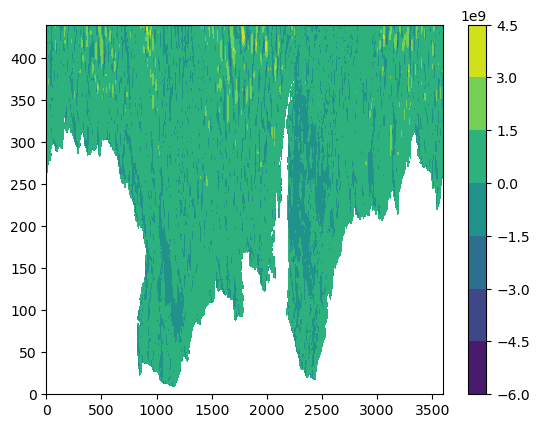

In [55]:
cmap = plt.contourf(tx_trans_int_z_test -ty_trans_int_z_test)
plt.colorbar(cmap)

In [57]:
ty_trans = cc.querying.getvar(expt=expt, variable='ty_trans', 
                          session=session, frequency = '1 monthly').sel(yu_ocean = slice(-79,-60)).sel(time=flex_period)#.chunk({ 'yu_ocean':69, 'xt_ocean':360})
ty_trans_derived = ty_trans.isel(time = 100).sum(dim = 'st_ocean')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

In [58]:
ty_trans_derived.load()

<xarray.DataArray 'ty_trans' (yu_ocean: 440, xt_ocean: 3600)> Size: 6MB
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-6.1563976e+07, -7.6099528e+07, -4.2355980e+07, ...,
         4.0806285e+08,  2.1794048e+08,  4.0109992e+07],
       [-9.4866896e+07, -1.2310038e+08, -1.0104843e+08, ...,
         3.7384966e+08,  1.8816208e+08,  8.6926540e+06],
       [-9.6575584e+07, -1.4261994e+08, -1.4839565e+08, ...,
         3.1166026e+08,  1.5025834e+08,  1.9717970e+06]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
    time      object 8B 2118-05-16 12:00:00
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02

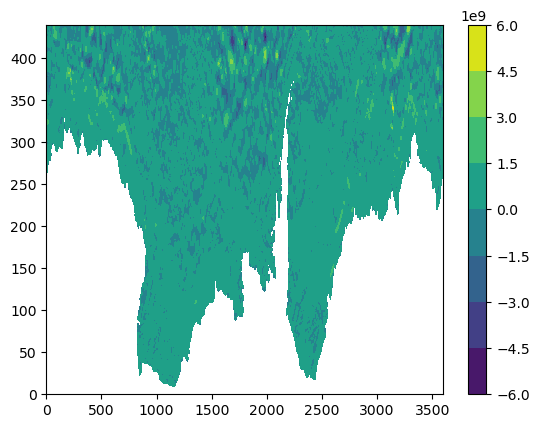

In [59]:
cmap = plt.contourf(ty_trans_derived -ty_trans_int_z_test)
plt.colorbar(cmap)

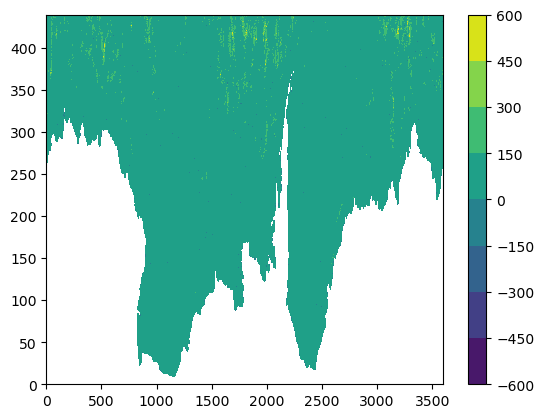

In [60]:
ty_trans_int_z_corrected = ty_trans_int_z_test - tx_trans_int_z_test
cmap = plt.contourf(ty_trans_derived.values -ty_trans_int_z_corrected)
plt.colorbar(cmap)

#### existing ty_trans_int_z diagnostic is wrong here in qian's experiments
correct by vertical sum or doing ```ty_trans_int_z_corrected = ty_trans_int_z - tx_trans_int_x```

 * [x] exp_wthmp
 * [x] exp_wthp
 * [x] exp_ctrl